In [27]:
# library
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

In [4]:
x = np.array([-0.31,-0.67,-0.61,-2.07,-1.31])
m = x.mean()
s = np.sqrt(x.var(ddof=1)) #decrease of degree of freedom, # s : sample standard deviation
n = len(x)
se = s/np.sqrt(n) # Estimated Standard error of sample mean

In [5]:
SN = sp.stats.norm() # 정규분포 class, default는 표준정규분포

In [8]:
SN.pdf(1) # 표준 정규분포의 확률밀도함수

0.24197072451914337

In [9]:
SN.cdf(1)

0.8413447460685429

In [10]:
SN.ppf(0.5) # cdf의 역함수

0.0

In [11]:
SN.ppf(0.8413)

0.9998150936147446

In [12]:
p = np.array([0.99,0.95,0.90]) # CI를 구할 것임

In [13]:
k = SN.ppf(1-(1-p)/2) # ppf : cdf의 역함수

In [15]:
ci_norm = np.concatenate((p,m-k*se,m+k*se)).reshape((3,3)).T # transpose

In [19]:
z = (m-0)/se # 귀무가설을 M = 0 이라고 가정할 때
z

-3.1608000334792035

In [21]:
pv_norm = 2*(1-SN.cdf(abs(z)))
pv_norm

0.0015733647181586097

In [23]:
# Assuming H0 ~ T ; T분포는 모집단의 분산을 우리가 알 수 없을 때, T 테스트는 표본평균을 가지고 모평균을 검정할때 사용
ST = sp.stats.t(n-1)
p = np.array([0.99,0.95,0.90])
k = ST.ppf(1-(1-p)/2)
ci_t = np.concatenate((p,m-k*se,m+k*se)).reshape((3,3)).T
t = (m-0)/se
pv_t = 2*(1-ST.cdf(abs(t)))

# using python function
sp.stats.ttest_1samp(x,popmean=0) #귀무가설 모평균이 0이다 # 위의 과정을 ttest 함수로 통계량과 pvalue가 나옴

Ttest_1sampResult(statistic=-3.160800033479203, pvalue=0.03415782015509721)

In [24]:
###########################################################
# one-sample t-test
###########################################################
d = np.array([-0.31,-0.67,-0.61,-2.07,-1.31])
r = sp.stats.ttest_1samp(d,0)

In [26]:
r

Ttest_1sampResult(statistic=-3.160800033479203, pvalue=0.03415782015509721)

In [66]:
# data01_iris.csv 에서 setosa 품종의 평균 Sepal Length가 4가 아니라는 
# 가설에 대한 p-value를 구하시오.
iris = pd.read_csv('Practices1/data01_iris.csv')

In [33]:
x=data[data['Species']=='setosa']['Sepal.Length']
x

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: Sepal.Length, dtype: float64

In [34]:
x1 = np.array(x)
x1

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [61]:
x1_ttest = sp.stats.ttest_1samp(x1,popmean=5.1) # 모평균이 5.1에 대한 t 검정
x1_ttest

Ttest_1sampResult(statistic=-1.8856732506697453, pvalue=0.06527445885090742)

In [62]:
m = x1.mean()
s = np.sqrt(x1.var(ddof=1)) #decrease of degree of freedom, # s : sample standard deviation
n = len(x1)
se = s/np.sqrt(n)

SN = sp.stats.norm()
z = (m-5.1)/se # 모평균이 5.1에 대한 z 검정
pv_norm = 2*(1-SN.cdf(abs(z)))
pv_norm

0.059338999668881565

In [64]:
# 정규분포와 t분포는 표본수(n)이 커지면 비슷해짐 => 중심극한정리에 의해 표본수가 많으면 표본평균은 정규분포를 따르기 때문에 z test 사용

In [67]:
###########################################################
# two-sample t-test
###########################################################

np.random.seed(1)
x1 = np.random.normal(0.5,1,100)
x2 = np.random.normal(0.5,2,100)
r = sp.stats.ttest_ind(x1,x2)
r.pvalue
# what is the number of samples for pvalue < 0.01

iris1 = iris[ iris['Species']=='versicolor' ]
iris2 = iris[ iris['Species']=='setosa' ]
sp.stats.ttest_ind(iris1['Sepal.Length'],iris2['Sepal.Length']) # default는 두 집단의 분산이 같다는 가정으로 t-test

Ttest_indResult(statistic=10.52098626754911, pvalue=8.985235037487077e-18)

In [68]:
sp.stats.ttest_ind(iris1['Sepal.Length'],iris2['Sepal.Length'],equal_var=False) # 두 집단의 분산이 다르다는 가정으로 t-test

Ttest_indResult(statistic=10.52098626754911, pvalue=3.746742613983842e-17)

In [69]:
# what is the p-value between Petal Length of versicolor and virginica 
# for samples of which Petal Length > 4
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [80]:
versi = np.array(iris[(iris['Species']=='versicolor') & (iris['Petal.Length'] > 4)]['Petal.Length'])
virgi = np.array(iris[(iris['Species']=='virginica') & (iris['Petal.Length'] > 4)]['Petal.Length'])
sp.stats.ttest_ind(versi, virgi, equal_var=False) # 두 표본의 샘플 개수가 달라도 가능

Ttest_indResult(statistic=-11.470014122876544, pvalue=3.719623773733949e-18)

In [83]:
versi.shape

(34,)

In [84]:
virgi.shape

(50,)

In [87]:
###########################################################
# correlation test
###########################################################

np.random.seed(2)
z = np.random.normal(0,1,100)
x = 0*z + np.random.normal(0,1,100)
y = 0*z + np.random.normal(0,1,100)
r = sp.stats.pearsonr(x,y) # 상관관계를 검정하는 많은 것 중 pearsonr이 유명
r[0] # correlation coefficient
r[1] # p-value of correlation test
# what is the number of samples that makes p-value < 0.001

sp.stats.pearsonr(iris['Sepal.Width'],iris['Petal.Length'])

(-0.42844010433053975, 4.5133142672730603e-08)

In [91]:
# what is the correlation and p-value between Sepal Length and Petal Width of setosa?
sl = np.array(iris[(iris['Species']=='setosa')]['Sepal.Length'])
pw = np.array(iris[(iris['Species']=='setosa')]['Petal.Width'])
r=sp.stats.pearsonr(sl,pw)
r

(0.27809835293596963, 0.05052644176398267)

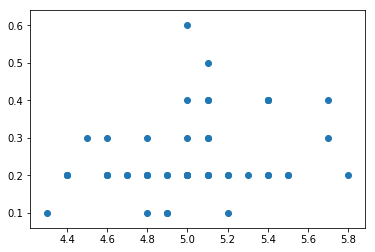

In [92]:
plt.scatter(sl,pw)

In [98]:
###########################################################
# chisq test
###########################################################

np.random.seed(3)
w = 1
z = np.random.normal(0,1,100)
x = w*z + np.random.normal(0,1,100)
y = w*z + np.random.normal(0,1,100)
x2 = pd.cut(x,3,labels=['N','M','W']) # 3등분으로 나눔
y2 = pd.cut(y,3,labels=['N','M','W']) # 3등분으로 나눔
tbl = pd.crosstab(x2,y2) # 카테고리 데이터를 카운팅 해주는 함수
r = sp.stats.chisquare(tbl,axis=None) # axis 값을 None으로 설정해주어야 함
r.pvalue
# what is the weight for p-value < 0.001?

x = pd.cut(iris['Sepal.Width'],3)
y = iris['Species']
tbl2 = pd.crosstab(x,y)
sp.stats.chisquare(tbl2,axis=None)

Power_divergenceResult(statistic=85.79999999999998, pvalue=3.301374617223752e-15)

In [100]:
tbl2

Species,setosa,versicolor,virginica
Sepal.Width,,,
"(1.998, 2.8]",1,27,19
"(2.8, 3.6]",36,23,29
"(3.6, 4.4]",13,0,2


In [103]:
# Sepal.Width와 Petal.Length 사의 correlation test의 pvalue
sp.stats.pearsonr(iris['Sepal.Width'],iris['Petal.Length'])

(-0.42844010433053975, 4.5133142672730603e-08)

In [104]:
# Sepal.Width와 Petal.Length를 pd.cut을 이용하여 level 4개짜리 
# 범주형 데이터로 변형한 후 chi-square test를 하셔서 
# pvalue를 구하시오.

In [105]:
###########################################################
# one-way anova (f-test)
###########################################################

iris1 = iris[iris['Species']=='setosa']
iris2 = iris[iris['Species']=='versicolor']
iris3 = iris[iris['Species']=='virginica']

sp.stats.f_oneway(iris1['Sepal.Length'],iris2['Sepal.Length'],iris3['Sepal.Length'])

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [106]:
sp.stats.f_oneway(iris1['Sepal.Length'],iris2['Sepal.Length'])
sp.stats.ttest_ind(iris1['Sepal.Length'],iris2['Sepal.Length'])

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487077e-18)

In [109]:
###########################################################
# Practice , 유의수준 5%
###########################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
Sales          100 non-null float64
SalesBin       100 non-null object
CompPrice      100 non-null int64
Income         100 non-null int64
Advertising    100 non-null int64
Population     100 non-null int64
Price          100 non-null int64
ShelveLoc      100 non-null object
Age            100 non-null int64
Education      100 non-null int64
Urban          100 non-null object
US             100 non-null object
dtypes: float64(1), int64(7), object(4)
memory usage: 9.5+ KB


In [137]:
# practice 2
df = pd.read_csv('Practices1/data04_carseat.csv')

# case 2
plist = []
y = df['SalesBin']
for i in range(2,df.shape[1]):
    v = df.iloc[:,i]
    if type(v[0]) == type('string'): # categorical
        tbl = pd.crosstab(y,v)
        r = sp.stats.chisquare(tbl,axis=None)
    else:
        v1 = v[ y=='1High' ]
        v2 = v[ y=='0Low' ]
        r = sp.stats.ttest_ind(v1,v2)
    plist.append(r.pvalue)

RES = pd.DataFrame({"Name":df.columns[2:df.shape[1]], "Pvalue":plist})
RES

,Name,Pvalue
0,CompPrice,0.219908
1,Income,0.006826
2,Advertising,0.000040
3,Population,0.244377
4,Price,0.000757
5,ShelveLoc,0.000005
6,Age,0.023840
7,Education,0.839751
8,Urban,0.001851
9,US,0.018566


In [138]:
df.head()

,Sales,SalesBin,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,1High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,1High,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,1High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,0Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,0Low,141,64,3,340,128,Bad,38,13,Yes,No
